# Fairness in Social Influence Maximization via Optimal Transport  
### Authors: Guillaume MARIN-BERTIN & Jaishan BURTON ELMO  

**Table of Contents**  
- 1. [Introduction](#introduction)  
- 2. [Mutual Fairness: A New Metric](#mutual-fairness)  
- 3. [Metric in practice](#fairness-vs-efficiency)  
- 4. [Improving Fairness with S3D](#s3d-algorithm)
- 5. [Experiment](#experiment)  
- 6. [Conclusion](#conclusion)  
- [References](#references)  

This is a blog post about the article “Fairness in Social Influence Maximization via Optimal Transport” published by Shubham Chowdhary et al. in 2024 and available [**here**](https://neurips.cc/virtual/2024/poster/94521).

### [1. Introduction](#introduction)  
In today’s digital society, social networks play a major role in how information spreads. Whether it is a public health campaign, a political message, or viral marketing, the ability to maximize influence is crucial. Companies, governments, and organizations leverage Influence Maximization (IM) algorithms to strategically select key individuals—called seeds—who will initiate a diffusion process, ensuring that information reaches the largest possible audience.  

Imagine a scenario where a job-matching platform uses an Influence Maximization (IM) strategy to promote career opportunities to young professionals. The goal is to spread job postings efficiently across different professional communities. However, due to the structure of the social network, the algorithm selects key individuals (seeds) in such a way that:

- In 50% of cases, all the job opportunities are shared within a network of university graduates, while vocational school graduates receive none.
- In the other 50% of cases, the opposite happens.  

At first glance, this might seem fair: both groups have an equal expected chance of seeing the job offers. However, in practice, one group is always entirely excluded in each scenario, creating a systemic disadvantage for those who miss out on critical career opportunities.

To fix this, researchers have tried adding fairness constraints to IM algorithms. The main ideas include:  

- **Equity-based fairness** (Stoica et al., 2020): Ensures that each group has the same expected proportion of influenced users.  
- **Max-min fairness** (Fish et al., 2019; Zhu et al., 2019): Maximizes the minimum probability that any group receives information.  
- **Diversity-aware methods** (Tsang et al., 2019): Ensure that no single group dominates the influence process.  

Despite these efforts, a fundamental issue remains: existing metrics treat groups independently and do not capture the joint probability of outreach. This means they can create the illusion of fairness while still allowing systematic exclusion of certain communities.

To address this, we propose a new fairness-aware framework that better distributes influence across communities:

1. **Mutual Fairness**: A better way to measure fairness, inspired by Optimal Transport. Instead of just looking at how much information each group gets in total, it ensures they receive the message at the same time.  
2. **S3D Algorithm**: A smarter way to choose influencers, balancing fairness and efficiency. It adjusts seed selection dynamically to improve fairness while still reaching as many people as possible.  

### [2. Mutual Fairness: A New Metric](#mutual-fairness)

##### **Why make a new metric?**

To understand why a new metric is necessary, let’s examine two situations where information propagation appears fair,we take the example of the introduction.

Consider two groups, C1 and C2, each with an outreach probability distribution:

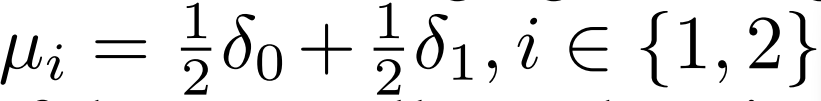

   - δ<sub>0</sub> represents the case where the information is not transmitted.
   - δ<sub>1</sub> represents the case where the information is successfully received by the group.

On average, both groups have a 50% chance of receiving the information, which might suggest a fair situation. However, this average hides significant differences in the actual distribution of information, as illustrated in the example below:

<center>

![figure2.png](attachment:figure2.png)
</center>

First case (γa) :

   - δ<sub>(0,0)</sub>: Neither group receives the information (50%).
   - δ<sub>(1,1)</sub>: Both groups receive the information simultaneously (50%).

This configuration is fair because if one group does not receive the information, the other does not either.

Second case (γb) :

   - δ<sub>(0,0)</sub>: Neither group receives the information (25%).
   - δ<sub>(1,1)</sub>: Both groups receive the information simultaneously (25%).
   - δ<sub>(0,1)</sub>: Group 1 does not receive the information, but Group 2 does (25%).
   - δ<sub>(1,0)</sub>: Group 1 receives the information, but Group 2 does not (25%).

In this case, there is a 50% chance that only one group will receive the information, creating an inequality. However, the marginal averages remain the same (µ<sub>1</sub>=µ<sub>2</sub>=50%).

The distributions γ<sub>a</sub> and γ<sub>b</sub> are very different, yet the marginal averages do not capture these nuances. This highlights the need for a new metric to evaluate fairness more precisely, beyond simple averages.

#### **Proposed fairness metric**

The idea is to start from a joint probability measure γ rather than the marginal averages μ<sub>i</sub>. From γ, we aim to measure the distance between it and an ideal distribution γ*, where each group receives the same amount of information in all cases.

To illustrate this on a figure:

   - The x-axis represents the amount of information received by group 1.
   - The y-axis represents the amount of information received by group 2.
   - The diagonal signifies that both groups receive exactly the same amount of information, which corresponds to the ideal sought.

A movement perpendicular to the diagonal should be penalized, as it indicates an imbalance in the distribution of information between the groups. Similarly, we must penalize movement along the diagonal, as it affects efficiency. These costs are measured by Euclidean distance.
In the figure below, we observe the transition from a distribution γa to a distribution γb, broken down into two components. One is dashed, representing the efficiency, and the other is solid, representing the fairness.

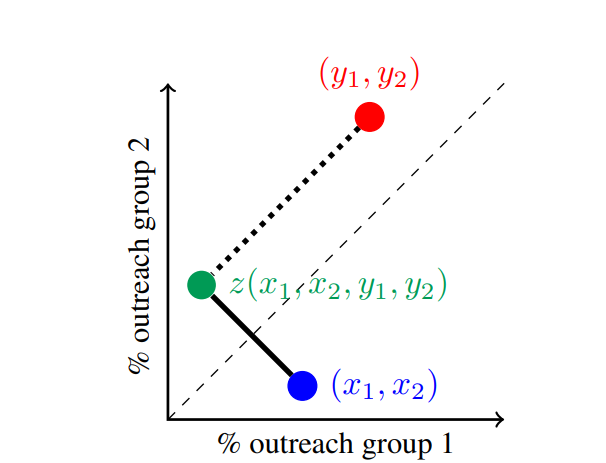

To define this cost, we use the following formula:

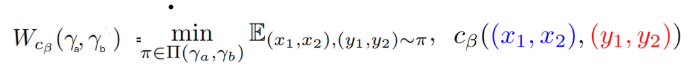


We can draw an analogy with a move, where the goal is to transport items from House A to House B at the lowest possible cost, while ensuring that each item reaches its final destination according to W<sub>cβ</sub>(γ<sub>a</sub>, γ<sub>b</sub>).

   - γ<sub>a</sub>: represents the list of items present in House A, specifying where they are located and in what quantity.
   - γ<sub>b</sub>: represents the list of items expected in House B, indicating where they should arrive and in what quantity.
   - c: This is the function that specifies the cost of moving an item from one location to another. In Figure 4, we evaluate the transport cost between the point (x1, x2) and (y1, y2). We take z(x1, x2, y1, y2) as an intermediate point in the movement of an item to simplify the calculations. The transport cost is then defined as follows:

   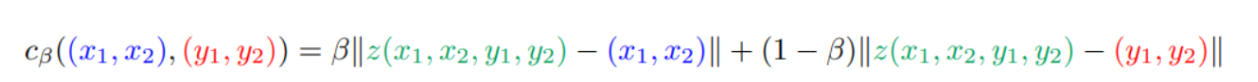

   - β: A coefficient used to weight the importance of fairness relative to efficiency.
   - π: This is the "moving plan." It indicates how many items are moved from each location in House A to each location in House B.

The goal is to find the plan π that minimizes the total moving cost while ensuring an equitable distribution of items between the destinations.

To arrive at the final formula, we start with the W<sub>cβ</sub> distance, which measures the transport cost between the current distribution γ and the ideal distribution γ*. Using the Euclidean norm to measure the distance between the points (x1, x2) and (y1, y2), we factor and generalize the terms to obtain the following equality:

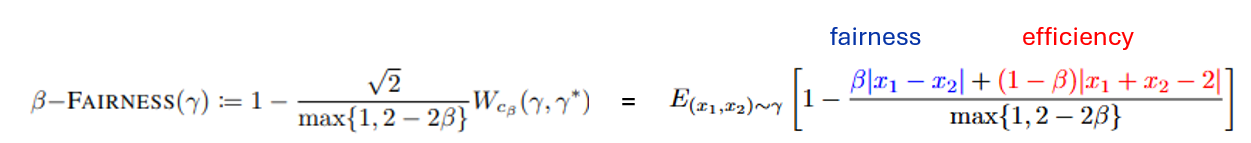

This formula combines both fairness (measured by |x1 - x2|) and efficiency (measured by |x1 + x2 - 2|), weighted by the parameter β. The term max{1, 2 - 2β} ensures that the metric remains normalized between 0 and 1.

#### **Short example** 

To better understand the impact of this metric, let's examine several concrete cases of information distribution. We will compare different distributions and see how the mutual fairness metric allows us to evaluate them, considering both fairness and efficiency.

Consider the cases where γ = δ<sub>(0,0)</sub> and γ* = δ<sub>(1,1)</sub>. We also add an intermediate example γ<sub>ex</sub> = δ<sub>(0.8, 0.2)</sub>, where 80% of group 1 has access to the information, compared to only 20% for group 2.

By taking β = 0.6, which slightly favors fairness, we obtain the following results:

   - fairness(γ*) > fairness(γ), confirming that the information is better distributed when everyone receives it.
   - fairness(γ<sub>ex</sub>) ≈ fairness(γ), because although γ<sub>ex</sub> is twice as efficient (|0.8 + 0.2 - 2| = 1 versus |0 + 0 - 2| = 2), its score is heavily penalized by the lack of fairness. Indeed, one group is significantly favored over the other, making it as unbalanced as γ.

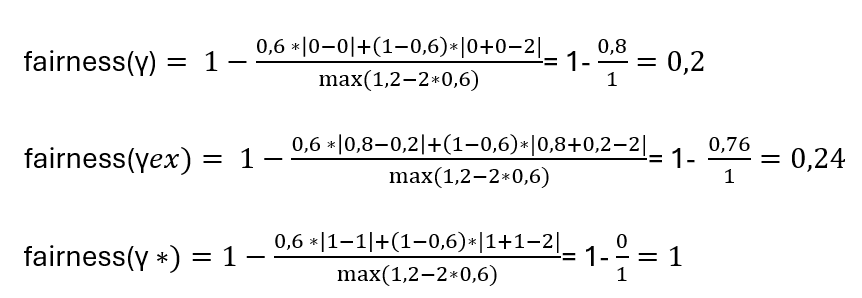

### [3.Metric in practice](#fairness-evaluation)

#### **Mutual fairness in practice**

We apply this metric to different datasets, which include social networks and communities partitioned into two groups. To do this, we load the dataset as a graph (V, E) and select a seedset S of size varying between 2 and 90. To diffuse the information, we use a probability p in the interval [0,1]. Since the process is stochastic, we repeat the operation 1000 times.

The results in Figure 7 illustrate how information propagation varies depending on the probability p. In figure (a), with p = 0.5, the information is disseminated in a way that is both efficient and equitable, with the groups being highly connected. The behavior is deterministic, with similar results in each iteration. In figure (b), when p is reduced to 0.1, the propagation remains equitable but becomes less efficient, reaching on average only 20% of each group instead of nearly 100% as in (a).

In figure (c), the outcomes are highly random: depending on the iteration, either one group receives all the information or the other, highlighting an inequity that is overlooked by traditional metrics. Finally, figure (d) reveals a slight bias, where the variance of the distribution extends but does not remain centered on the diagonal. Although some metrics might consider this situation fair, mutual fairness provides more insight by evaluating fairness in each realization rather than just averaging it.

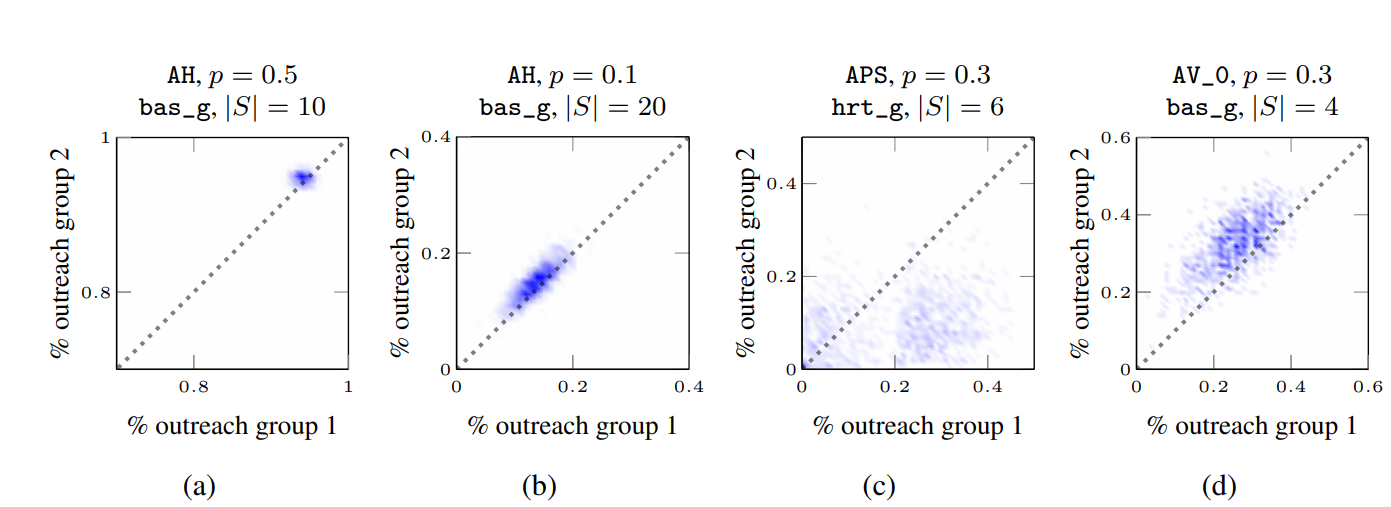

#### **Impact of  β**

The results of the metric as a function of β are illustrated in Figure 9. Yellow indicates a low transport cost, while blue signals a deviation from the ideal.

When β = 0 (figure 9a), only efficiency is considered: the information reaches the maximum number of people, but without regard for fairness. In contrast, with β = 1 (figure 9d), only fairness is optimized, resulting in a perfectly equitable distribution but with reduced efficiency.

An optimal balance is achieved for β = 0.66 (figure 9c), where the transport cost is minimized at the top-right of the plane. The further one moves away from this point, the higher the cost (blue areas), indicating a reduced level of optimization.

In summary, as β increases, fairness is prioritized, and getting closer to the diagonal reduces the transport cost, ensuring an equitable and efficient diffusion of information. Thus, the formula dynamically adjusts the trade-off between fairness and efficiency, with β acting as the weighting parameter that influences the distribution of the cost.

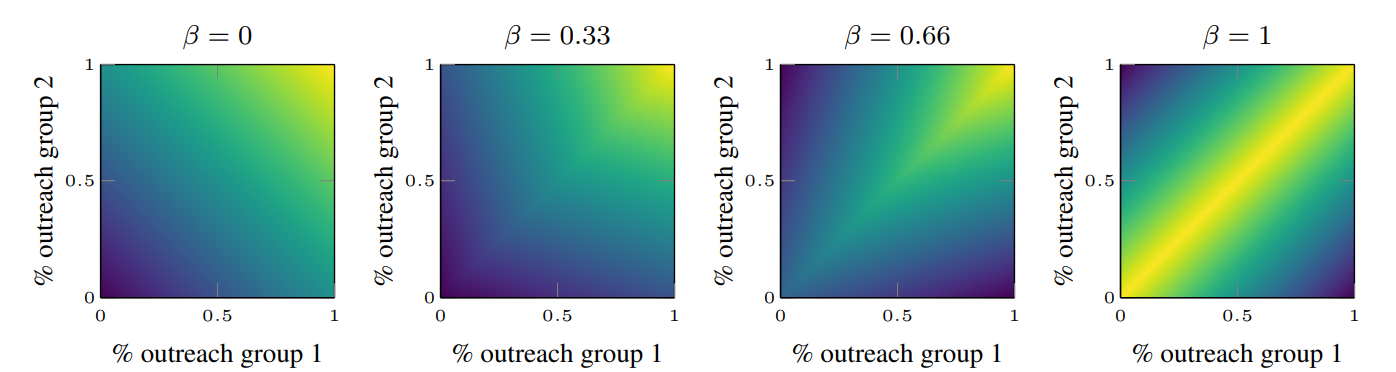

Now that we have our metric to determine if a distribution is fair and efficient, we want to focus on an algorithm to select the right seeds.

### [4. Improving Fairness with S3D](#s3d-algorithm)

#### Stochastic Seed Selection Descent (S3D)

While Mutual Fairness provides a way to measure fairness, Influence Maximization (IM) algorithms still need a method to optimize it without sacrificing outreach. S3D addresses this by dynamically adjusting seed selection to ensure a balanced information spread across all communities.

Instead of selecting influential nodes solely based on popularity, S3D explores alternative seed sets, optimizing both fairness and outreach through an iterative process:

The algorithm follows these key steps:

1. **Initial Seed Selection**:  
   Influential nodes are chosen using traditional heuristics (e.g., degree centrality, community detection).

2. **Exploration of Neighboring States**:  
   The algorithm tests alternative seed sets by adding, swapping, or removing nodes.   

3. **Fairness Evaluation**:  
   Each set is scored using the β-Fairness metric, which balances fairness and efficiency.

4. **Acceptance Criteria (Metropolis-Hastings Selection Rule)**:  
   The new seed set \(S'\) is accepted with a probability defined as:
$$
p_{\text{accept}} \leftarrow \min \left\{ 1, e^{E_S - E_{S'}} \right\}
$$

   ensuring fairness-improving modifications are favored while maintaining some randomness.

5. **Convergence**:  
   The process runs until the fairness score stabilizes, achieving an optimal trade-off between fairness and outreach.

### [5. Experiment](#experiment)

To evaluate the effectiveness of S3D, we compare it against traditional influence maximization algorithms on real-world social networks.  

Dataset : Here we can take for example job-matching networks where nodes represent individuals looking for job opportunities and edges represent connections between people (e.g., same school, same company, LinkedIn network).

- Traditional IM methods (bas_d, bas_g) → Select highly connected influencers, ignoring fairness.
- Fairness-aware heuristics (hrt_d, hrt_g) → Older fairness-based methods with static rules.
- S3D (our approach) → Dynamically selects seeds to balance fairness and efficiency.

1. Fairness (Mutual Fairness Score) – Measures how equally information is distributed across different groups.
2. Efficiency (Total Outreach) – Measures how many people receive job opportunities in total.  

#### Does S3D Improve Fairness?  

Imagine a job-matching platform that aims to spread job opportunities equally across university graduates and vocational school graduates.

- Traditional IM methods pick influencers mostly from highly connected elite universities, leaving out vocational school graduates.
- S3D Solution: By dynamically adjusting seed selection, S3D ensures that both communities receive job postings more equitably.

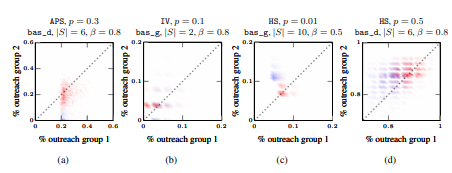

- S3D (red points) significantly improves fairness compared to label-blind methods (blue).
- The outreach distribution shifts towards the diagonal, meaning both groups receive information more equally.
Without S3D, certain communities miss job postings entirely in some scenarios.

#### How Does S3D Balance Fairness and Efficiency?  

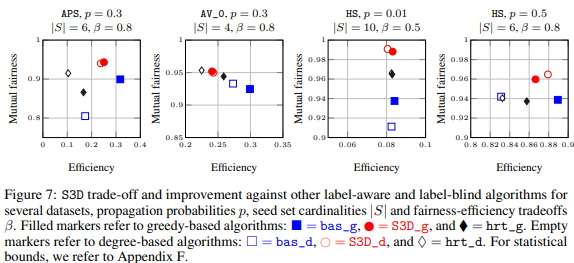

- S3D achieves the highest fairness scores (y-axis).  
- Minimal efficiency loss (x-axis) → Proves that fairness gains do not come at a high cost.
- Insight: S3D is most useful in moderately connected networks (e.g., workplaces, schools).

#### Impact of S3D 

S3D improves information dissemination by ensuring a more equitable distribution between different groups, without sacrificing efficiency. In our job-matching example, it allows graduates of professional schools to access the same opportunities as those from prestigious universities, thus leading to inequalities linked to the social network. Thanks to its adaptive approach, S3D stands out as an effective solution to correct the biases of traditional algorithms while maintaining a broad reach. 

### [6. Conclusion](#conclusion)

As a conclusion, we can say that fairness in Social Influence Maximization is crucial to prevent systemic exclusion in information dissemination. Traditional methods often favor well-connected individuals, reinforcing existing inequalities. By introducing Mutual Fairness and the S3D algorithm, we provide a framework that balances fairness and efficiency, ensuring a more equitable outreach. Through our job-matching case study for example, we demonstrated that S3D significantly reduces bias while maintaining high influence spread. These results confirm that fairness-aware approaches can be both practical and impactful, making them essential for real-world applications such as hiring, education, or public awareness campaigns.

### References

1. Chowdhary, S., et al. (2024). Fairness in Social Influence Maximization via Optimal Transport. *NeurIPS 2024*. Available here [https://neurips.cc/virtual/2024/poster/94521](https://neurips.cc/virtual/2024/poster/94521).
